identity
53.2787%
52.0492%
54.7131%
54.0984%
53.9617%
51.7760%
52.3224%
53.7568%
53.8251%
54.0301%
52.8689%
52.0492%
53.6202%
51.6393%
52.1858%
53.0738%
55.3279%
53.2104%
55.4645%
53.4153%
55.1230%
53.6885%
53.4153%
51.7760%
53.0738%
51.5027%
53.2104%
55.6011%
53.5519%
54.3716%
52.8689%
56.0109%
53.0738%
52.8005%
54.7814%
53.6202%
51.7760%
54.5765%
53.9617%
53.4153%
52.1175%
53.6885%
55.0546%
54.1667%
53.1421%
54.5765%
53.6202%
55.3962%
54.5082%
51.6393%
logistic
53.6202%
51.6393%
49.7951%
53.2104%
54.1667%
53.5519%
52.1858%
55.2596%
51.0929%
52.3224%
53.1421%
55.2596%
53.6202%
51.8443%
54.3033%
52.0492%
55.3279%
54.5765%
55.8743%
53.9617%
53.6885%
52.8005%
55.1913%
54.1667%
53.0055%
54.9863%
54.1667%
54.9863%
53.0055%
53.3470%
53.2104%
51.2295%
51.7760%
53.4153%
53.3470%
53.4836%
51.9126%
52.2541%
52.2541%
53.2104%
53.2104%
53.9617%
54.6448%
52.6639%
53.9617%
53.2787%
52.5273%
55.0546%
52.1175%
51.9126%
tanh
52.8689%
53.2787%
53.0055%
52.9372%
53.0055%
54.0984%
52.5956%
51.7077%
54.30

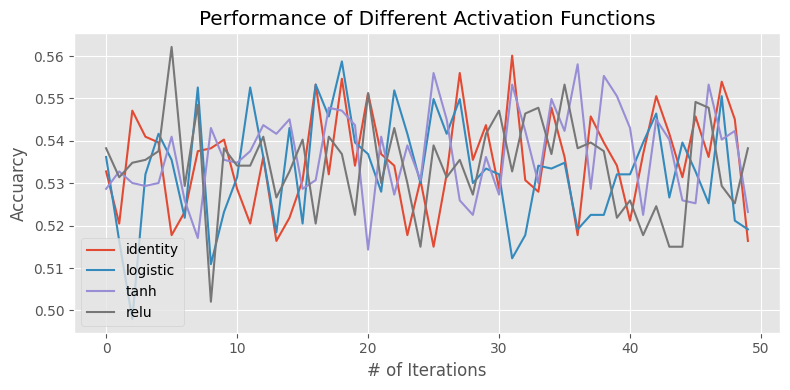

In [160]:
## Group 7 - Multilayer Perceptron Neural Network

# Libraries used in this project (Pandas, sklearn, matplotlib, numpy, random)
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import random

# Setting random seed for reproducibility
random.seed(123)
def mlpResults():
   # Different Activiation functions for Neural Network
   activationParams = ['identity','logistic','tanh','relu']

   # Dictionary to store activation function, keys, with its respective accuracy
   dict = {}

   # Loop through every type of Activation Function
   for activation in activationParams:
      mlpPredictions = []
      print(activation)
      for i in range(50):
         # Importing data of SPY ticker from 1993-Present
         df = pdr.get_data_yahoo("SPY", "1993-1-28", "2022-12-02")

         # Calculate the difference between Open-Close of the day
         df["Diff"] = df.Close.diff()
         # Calculate Simple Moving Average
         df["SMA_200"] = df.Close.rolling(200).mean()
         # Calculating Force Index, otherwise known as buying/selling pressure
         df["Force_Index"] = df["Close"] * df["Volume"]

         # Creating label where y == 1 when the day closed positive and 0 if the day closed negative
         df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)

         # Removing rows with NaN values
         df = df.drop(
            ["Open", "High", "Low", "Close", "Volume", "Diff", "Adj Close"],
            axis=1,
         ).dropna()

         # Format dataframe into arrays
         X = df.drop(["y"], axis=1).values
         y = df["y"].values

         # Split dataset by 80%-20%
         X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=0.2,
            shuffle=True,
         )

         # Creating Multilayer Perceptron Neural Network Classifier
         # 2 Hidden Layers: 1st Hidden Layer = 8 Neurons, 2nd Hidden Layer = 4 Neurons
         # Epochs = 200
         # Learning rate = 0.001
         # Optimization Function = Adam
         clf = make_pipeline(
            StandardScaler(),
            MLPClassifier(
               hidden_layer_sizes=(8,4,),
               max_iter=200,
               learning_rate_init=0.001,
               activation=activation,
               solver='sgd',
               random_state=42, 
               shuffle=False
               )
            )

         # Fitting data
         clf.fit(
            X_train,
            y_train,
         )

         # Checking model accuracy with test data
         y_pred = clf.predict(X_test)
         print(f'{accuracy_score(y_test, y_pred)*100:.4f}%')

         # Append accuracy of current activation to list
         mlpPredictions.append(accuracy_score(y_test, y_pred))
      
      # Creating Key-value pair with Activation function and a list of accuracy values
      dict[activation] = mlpPredictions

   return dict

mlps = []

dict = mlpResults()
x = [i for i in range(50)]

for key, value in dict.items():
   plt.plot(x, value, label=key)
   print(f'Average Accuracy of {key} function: {np.mean(value)}')

plt.legend()
plt.title('Performance of Different Activation Functions')
plt.xlabel('# of Iterations')
plt.ylabel('Accuarcy')
plt.show()

